In [1]:
%cd ..
%pip install -e .

/home/sandor/dtu/2021-22-spring/advanced_machine_learning/p-reg
Obtaining file:///home/sandor/dtu/2021-22-spring/advanced_machine_learning/p-reg
  Preparing metadata (setup.py) ... done
  Attempting uninstall: src
    Found existing installation: src 0.1.0
    Uninstalling src-0.1.0:
      Successfully uninstalled src-0.1.0
  Running setup.py develop for src
Note: you may need to restart the kernel to use updated packages.


In [2]:
import random

from src.models.dense import NN0
from src.models.dense import NN1
from src.models.gcn import GCN0

from src.models.train_model import train
from src.models.train_model import train_conf_pen
from src.models.train_model import random_splits

from src.models.evaluate_model import evaluate0
from src.models.evaluate_model import evaluate1

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.datasets import Planetoid
import torch_geometric.transforms as T
from sklearn.manifold import TSNE

from src.models.evaluate_model import test

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dataset = Planetoid(root='data/Planetoid', name='Cora', transform=T.NormalizeFeatures())
# no normalization, using n != 0 and m!= 0 instead
# doesnt work, just use normalization instead
# dataset = Planetoid(root='data/Planetoid', name='Cora')

data = dataset[0].to(device)

metrics = []

for num_training_nodes in  [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    data = random_splits(data, num_training_nodes, 20)
    splits = data.train_mask, data.val_mask, data.test_mask

    torch.manual_seed(1)
    random.seed(1)

    gcn_model = GCN0(num_node_features=dataset.num_node_features,
                        num_classes=dataset.num_classes) \
                    .to(device)

    gcn_model = train(gcn_model, data, mu=0, num_epochs=350)
    # gcn_model = train2(gcn_model, data)
    acc = evaluate0(gcn_model, data)
    # print(f'mu: {mu}, reg, Accuracy: {acc:.4f}')

    train_acc, val_acc, test_acc = evaluate1(gcn_model, data)
    metrics.append({'num_training_nodes': num_training_nodes, 'train_acc': train_acc, 'val_acc': val_acc, 'test_acc': test_acc})
    print(f'num_training_nodes: {num_training_nodes}, train_acc: {train_acc:.4f}, val_acc: {val_acc:.4f}, test_acc: {test_acc:.4f}')
    print('-------------------------------------------------------------')



num_training_nodes: 10, train_acc: 1.0000, val_acc: 0.8071, test_acc: 0.7486
-------------------------------------------------------------
num_training_nodes: 20, train_acc: 1.0000, val_acc: 0.7929, test_acc: 0.8035
-------------------------------------------------------------
num_training_nodes: 30, train_acc: 0.9952, val_acc: 0.8429, test_acc: 0.7846
-------------------------------------------------------------
num_training_nodes: 40, train_acc: 0.9964, val_acc: 0.8214, test_acc: 0.8256
-------------------------------------------------------------
num_training_nodes: 50, train_acc: 0.9943, val_acc: 0.8429, test_acc: 0.8354
-------------------------------------------------------------
num_training_nodes: 60, train_acc: 0.9905, val_acc: 0.8786, test_acc: 0.8399
-------------------------------------------------------------
num_training_nodes: 70, train_acc: 0.9816, val_acc: 0.8500, test_acc: 0.8393
-------------------------------------------------------------
num_training_nodes: 80, tra

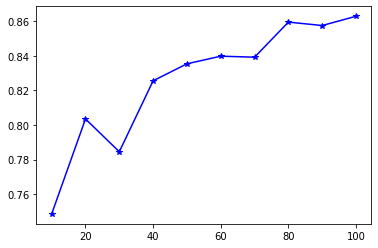

In [ ]:
import pandas as pd
import numpy as np


df = pd.DataFrame(metrics)
fig, ax = plt.subplots()
ax.plot(df['num_training_nodes'], df['test_acc'], '-b*',)
plt.show()